In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
res.x

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [4]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [5]:
res.x

array([1.4, 1.7])

Note use of different techniques for different problems.

In [6]:
#minimize?

## Interpolation

Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

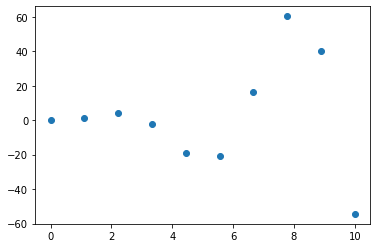

In [7]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between.

In [8]:
from scipy.interpolate import interp1d

In [9]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

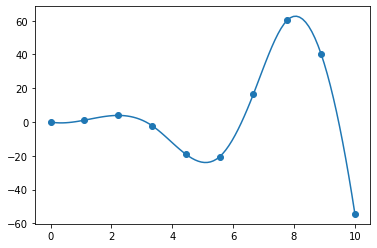

In [10]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

## Curve Fitting

Trivial Example

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

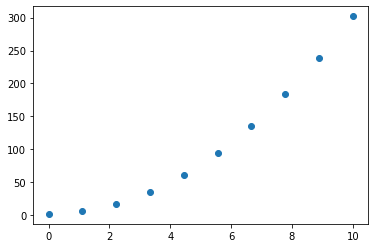

In [12]:
plt.scatter(x_data, y_data)

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [13]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [14]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

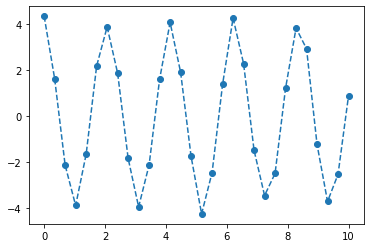

In [15]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [16]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.9989952 , 0.10411352])

In [17]:
A, w, phi = popt

In [18]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

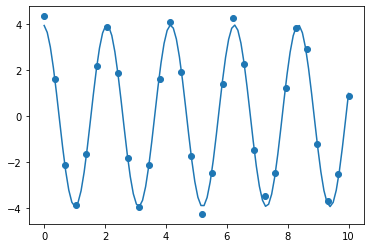

In [19]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [20]:
popt

array([3.94836219, 2.9989952 , 0.10411352])

The estimated error on the parameters

In [21]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575702])

# Calculus

## Differentiation

In [24]:
from scipy.misc import derivative

In [25]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

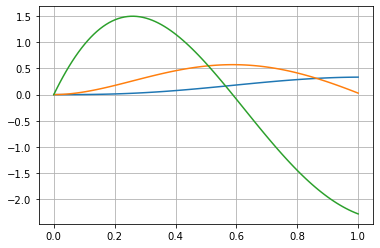

In [26]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))
plt.grid()

## Integration

Single integrals

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [27]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [28]:
integral

0.14558175869954834

Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [29]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [30]:
integral

0.590090324408853

## Differetial Equations

**First Order ODEs**

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [31]:
from scipy.integrate import odeint

All information about differential equation

In [32]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

Solve differential equation

In [33]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [34]:
v_sol = sol.T[0]

Plot

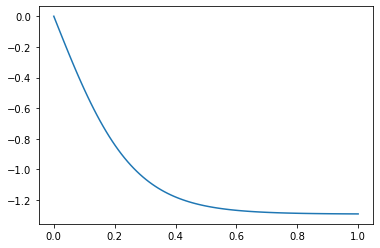

In [35]:
plt.plot(t, v_sol)

**Coupled first order ODEs**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [36]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [37]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [38]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

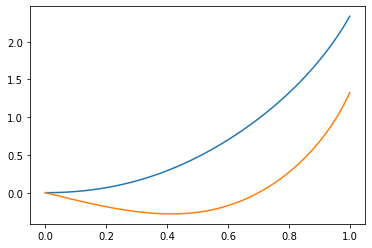

In [39]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

**Second Order ODEs**

Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $S = (\theta, \omega)$

In [40]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [41]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

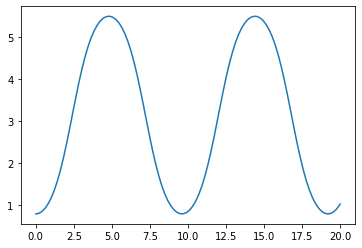

In [42]:
plt.plot(t, theta)
plt.show()

**Example 1**: Newton's law of cooling is

$$\frac{dT}{dt} = -k(T-T_s(t)) $$

where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:



In [47]:
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

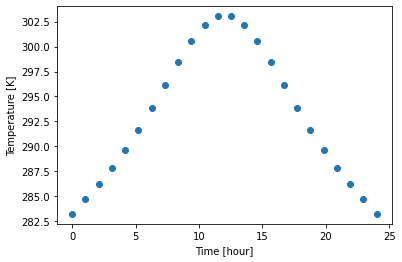

In [48]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [49]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [50]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

times = np.linspace(1, 23, 1000)
T0 = 284.6945461

In [51]:
sol = odeint(dTdt, T0, times).T[0]

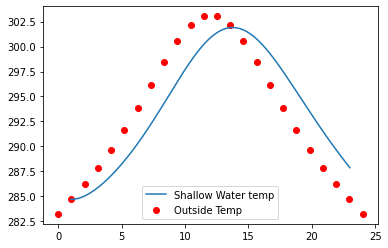

In [53]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

# Statistics

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [71]:
from scipy.stats import beta

Basic Statistics

In [72]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

Probability Distribution Plotting:

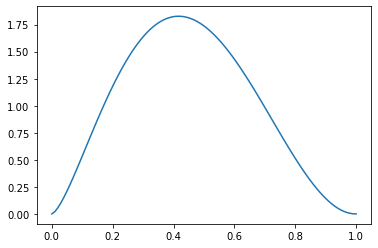

In [73]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Variables:

In [74]:
r = beta.rvs(a, b, size=10)
r

array([0.36519221, 0.34611788, 0.69248154, 0.79559517, 0.35850385,
       0.52820307, 0.59075396, 0.51043511, 0.48425268, 0.24519145])

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [75]:
from scipy.stats import norm

In [76]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

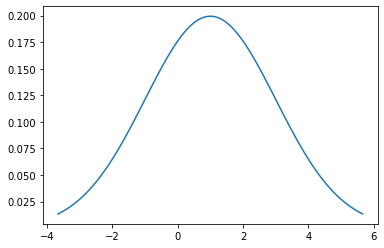

In [77]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

**Example 3**: Multinomial Distribution

$$ f(x_1, x_2, ..., x_k; p_1, p_2, ... p_k, n) = \frac{n!}{x_1! ... x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

Rolling a die

In [78]:
from scipy.stats import multinomial

p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p)

2.143347050754453e-05

In [79]:
multinomial.rvs(n=100, p=p, size=5)

array([[13, 28,  9, 20, 18, 12],
       [19, 17, 13, 22, 14, 15],
       [16, 13, 18, 19, 21, 13],
       [18, 11, 19, 19, 11, 22],
       [14, 14, 19, 16, 22, 15]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# The Goal of Curve Fitting

Purpose of interpolation

Given some $x_{\text{data}}=[...]$ and $y_{\text{data}}=[...]$ and a model function $f$ that depends on unknown parameters $\beta$ the goal is to find the optimal set of parameters $\beta$ such that the function $y=f(x,\beta)$ *best resembles* the data.

* One way of doing this is to minimize $\sum_i (f(x_i,\beta) - y_i)^2$ by adjusting the parameters in $\beta$. Here $x_i$ and $y_i$ are the ith data point. This is called the method of least squares

* If the $y_i$ data points have corresponding errors on them, then minimizing $\sum_i (f(x_i,\beta) - y_i)^2/\sigma_i^2$ gives the so called **maximum-likelihood** estimate for $\beta$. Given the data $x_i$ and $y_i$, the the value of $\beta$ obtained through this method is the most likely configuration.

Lets look at some sample data

In [ ]:
x_data = np.array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])
y_data = np.array([  2.95258285,   2.49719803,  -2.1984975 ,  -4.88744346,
        -7.41326345,  -8.44574157, -10.01878504, -13.83743553,
       -12.91548145, -15.41149046, -14.93516299, -13.42514157,
       -14.12110495, -17.6412464 , -16.1275509 , -16.11533771,
       -15.66076021, -13.48938865, -11.33918701, -11.70467566])

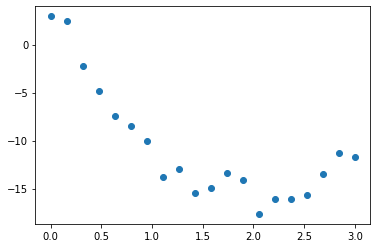

In [ ]:
plt.scatter(x_data,y_data)
plt.show()

Here is a model where $\beta = (a,b,c)$ and

$$f(x, \beta) = f(x, a, b, c) = a(x-b)^2 + c$$

We want to find the optimal values of $a$, $b$, and $c$ that fit the data above

This requires two steps

1. Define model function
2. Use scipy's `curve_fit` function. This requires giving initial guesses for $\beta$, which one needs to obtain carefuly for complicated models, or else the function might not work.

In [ ]:
def model_f(x, a, b, c):
    return a*(x-b)**2 + c

In [ ]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])

Two things are returned here:

1. `popt`, which gives the optimal parameters for the `model_f` given the data 

In [ ]:
popt

array([  4.92207991,   2.00492121, -16.04690266])

2. `pcov`: the covariance matrix, which gives an estimate of the "error" of the parameters (based on how sensitive the "goodness-of-fit" is to changing them) and the relation the parameters have to eachother (are two seperate parameters really needed?)

In [ ]:
pcov

array([[ 0.12827822, -0.01315915, -0.07363194],
       [-0.01315915,  0.00222114,  0.00322289],
       [-0.07363194,  0.00322289,  0.13377697]])

Lets plot the function with the optimal parameters next to the data

In [ ]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

Plot

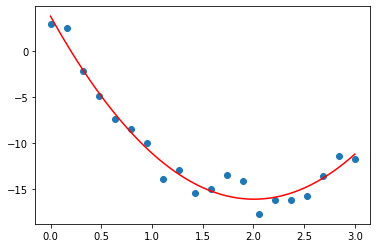

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
plt.show()

`pcov` is difficult to interpret, but we can do so as follows.

* the "error" of a parameter in the model is related to how sensitive the model is to that parameter. Does changing the parameter slightly give a better fit? (i.e. minimize $\sum_i (f(x_i,\beta) - y_i)^2$)

Lets look at an example below

In [ ]:
def fit_f(x, a, b, c, d):
    return a*(x-b)**2 + c + d*0.0001*np.cos(x)

In [ ]:
popt, pcov = curve_fit(fit_f, x_data, y_data, p0=[1,2,-16,1])

Lets look at a color plot of the `pcov` matrix:

In [ ]:
pcov

array([[ 1.45024157e-01, -4.03732292e-02,  4.08921392e-02,
         3.05314578e+03],
       [-4.03732292e-02,  7.20536914e-02, -3.07488304e-01,
        -8.46750721e+03],
       [ 4.08921392e-02, -3.07488304e-01,  1.52776217e+00,
         3.78842284e+04],
       [ 3.05314578e+03, -8.46750721e+03,  3.78842284e+04,
         1.03326868e+09]])

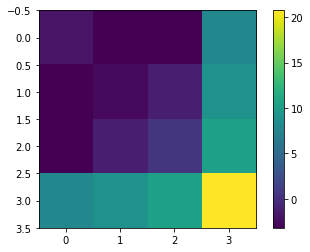

In [ ]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()